In [41]:
# Load library
import csv
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [42]:
# Read the current data
data = pd.read_csv("data/data_2005.csv", encoding='utf-8')
data.head()

,Unnamed: 0,id,date,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,...,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,26944,26944,1/2/2005,Burma,Singapore,Singapore,AFF Championship,5,2,19,...,7,10,4,4,2,3,NaN,NaN,NaN,lose
1,26945,26945,1/3/2005,Indonesia,Malaysia,Malaysia,AFF Championship,8,11,24,...,16,11,4,5,2,0,NaN,NaN,NaN,win
2,26946,26946,1/8/2005,Egypt,Uganda,Egypt,Friendly,6,1,17,...,13,7,5,1,2,2,NaN,NaN,NaN,win
3,26947,26947,1/8/2005,Indonesia,Singapore,Indonesia,AFF Championship,8,7,20,...,18,12,4,5,2,3,NaN,NaN,NaN,lose
4,26948,26948,1/8/2005,French Guyana,Jamaica,Jamaica,CFU Caribbean Cup qualification,0,0,12,...,10,22,2,4,3,5,NaN,NaN,NaN,lose


In [ ]:
# Is there any difference between "form" of winning team and lose team
# How many time a bad-form team won a good-form team?
# What is a good-form / bad-form team?
# Is playing as "Home Team" better than playing as "Away Team"?
# Is ratio-odd usually right? How much are they likely to be correct?

In [3]:
# Is playing as "Home Team" better than playing as "Away Team"?
# find pair team_1 = home_team -> win, team_1 ~= home_team -> lose
home1 = data[(data.team_1 == data.home_team) & (data.result == 'win')]
home2 = data[(data.team_1 != data.home_team) & (data.result == 'lose')]


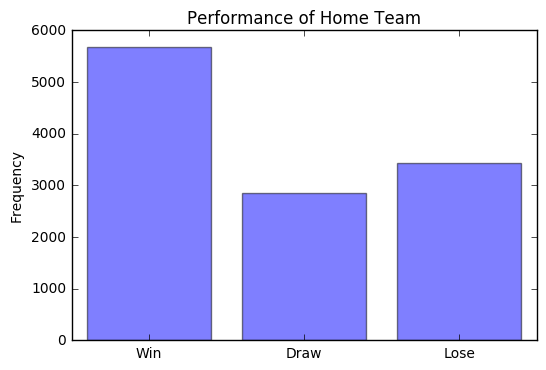

In [5]:

win = home1.shape[0] + home2.shape[0]
draw = data[data.result == 'draw'].shape[0]
lose = data.shape[0] - win - draw

objects = ('Win', 'Draw', 'Lose')
y_pos = np.arange(len(objects))
performance = [win,draw,lose]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency')
plt.title('Performance of Home Team')
 
plt.show()

In [4]:
# Consider history
win_result = data[data['result'] == 'win']
lose_result = data[data['result'] == 'lose']
draw_result = data[data['result'] == 'draw']

win_diff_win = pd.concat([win_result['h_win_diff'], -lose_result['h_win_diff']])
lose_diff_win = pd.concat([lose_result['h_win_diff'], -win_result['h_win_diff']])
draw_diff_win = draw_result['h_win_diff']

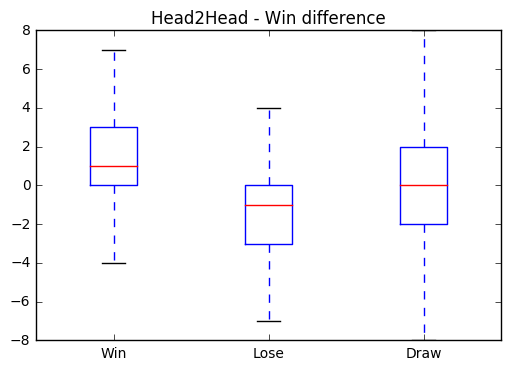

In [86]:
plt.figure()
plt.boxplot([win_diff_win,lose_diff_win,draw_diff_win],labels=['Win','Lose','Draw'],showfliers=False)

plt.title('Head2Head - Win difference')

plt.show()

In [9]:
ttest_ind(win_diff_win,lose_diff_win)

Ttest_indResult(statistic=35.432781367462361, pvalue=5.3865361955241691e-266)

In [7]:
# Is there any difference between "form" of winning team and lose team
# How many time a bad-form team won a good-form team?
# What is a good-form / bad-form team?

# fig, axes = plt.subplots(2, 4)
win_goalF  = pd.concat([win_result['f_goalF_1'], lose_result['f_goalF_2']])
lose_goalF = pd.concat([lose_result['f_goalF_1'], win_result['f_goalF_2']])
draw_goalF = pd.concat([draw_result['f_goalF_1'],draw_result['f_goalF_2']])

win_goalA  = pd.concat([win_result['f_goalA_1'], lose_result['f_goalA_2']])
lose_goalA = pd.concat([lose_result['f_goalA_1'], win_result['f_goalA_2']])
draw_goalA = pd.concat([draw_result['f_goalA_1'],draw_result['f_goalA_2']])

win_win  = pd.concat([win_result['f_win_1'], lose_result['f_win_2']])
lose_win = pd.concat([lose_result['f_win_1'], win_result['f_win_2']])
draw_win = pd.concat([draw_result['f_win_1'], draw_result['f_win_2']])

win_draw  = pd.concat([win_result['f_draw_1'], lose_result['f_draw_2']])
lose_draw = pd.concat([win_result['f_draw_1'], lose_result['f_draw_2']])
draw_draw = pd.concat([draw_result['f_draw_1'], draw_result['f_draw_2']])

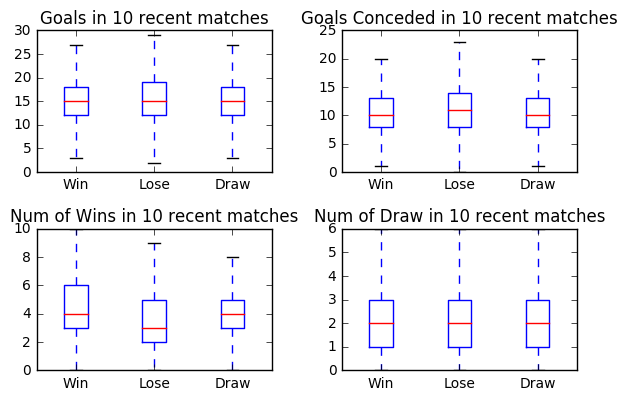

In [8]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# Goals
axs[0,0].boxplot([win_goalF,lose_goalF,draw_goalF],labels=['Win','Lose','Draw'],showfliers=False)
axs[0,0].set_title('Goals in 10 recent matches')

# Goals Conceded
axs[0,1].boxplot([win_goalA,lose_goalA,draw_goalA],labels=['Win','Lose','Draw'],showfliers=False)
axs[0,1].set_title('Goals Conceded in 10 recent matches')

# Wins
axs[1,0].boxplot([win_win,lose_win,draw_win],labels=['Win','Lose','Draw'],showfliers=False)
axs[1,0].set_title('Num of Wins in 10 recent matches')

# Draw
axs[1,1].boxplot([win_draw,lose_draw,draw_draw],labels=['Win','Lose','Draw'],showfliers=False)
axs[1,1].set_title('Num of Draw in 10 recent matches')

plt.show()

In [10]:
# t-test of number of win
ttest_ind(win_win,lose_win)

Ttest_indResult(statistic=29.488698758378064, pvalue=9.6646508941629036e-187)

In [6]:
# Is ratio-odd usually right? How much are they likely to be correct?

# Read the current data
data_odd = pd.read_csv("data/data_odd_match.csv", encoding='utf-8')
# data_2005.head()


In [8]:
data_odd.head()

,Unnamed: 0,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,452,171108,France: Ligue 1,2005-01-15,Monaco,5,Caen,2,1.398,3.7540,7.5690,1.44,4.2,9.75,Paddy Power,Pinnacle Sports,Expekt,10,10,10
1,693,171787,France: Ligue 1,2005-01-22,Monaco,2,Lens,0,1.471,3.3650,7.2750,1.53,3.6,9.00,Sportingbet,bet365,Expekt,10,10,10
2,1067,172612,France: Ligue 1,2005-01-30,Monaco,2,Paris SG,0,1.790,3.0300,4.4830,1.83,3.1,5.30,William Hill,BetVictor,Expekt,10,10,10
3,1481,173514,World: Friendly International,2005-02-08,Latvia,1,Finland,2,2.800,3.1929,2.2343,2.88,3.2,2.35,Sportingbet,bet-at-home,Expekt,7,7,7
4,1487,173539,World: World Cup,2005-02-09,Japan,2,North Korea,1,1.318,4.1900,8.6980,1.35,5.0,9.99,bet-at-home,bet365,BetVictor,5,5,5


In [7]:
# get average odd of win team, lose team
home_win = data_odd[data_odd.home_score > data_odd.away_score]
away_win = data_odd[data_odd.home_score < data_odd.away_score]
draw = data_odd[data_odd.home_score == data_odd.away_score]

In [9]:
# home_win_avg_odd = home_win['avg_odds_home_win']
win_avg_odd = pd.concat([home_win['avg_odds_home_win'],away_win['avg_odds_away_win']])
lose_avg_odd = pd.concat([home_win['avg_odds_away_win'],away_win['avg_odds_home_win']])
draw_avg_odd = draw['avg_odds_draw']

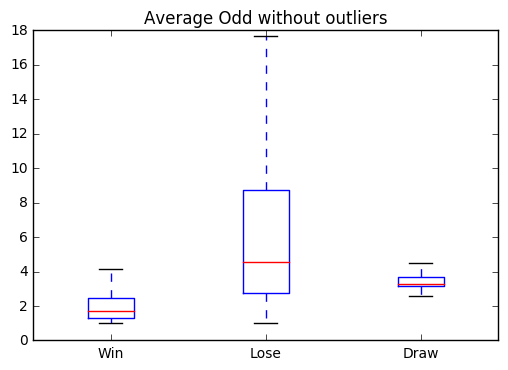

In [10]:
plt.figure()
plt.boxplot([win_avg_odd,lose_avg_odd,draw_avg_odd],labels=['Win','Lose','Draw'],showfliers=False)
plt.title('Average Odd without outliers')
plt.show()

In [79]:
stats.ttest_ind(win_avg_odd.values,lose_avg_odd.values)

Ttest_indResult(statistic=-43.22461132125629, pvalue=0.0)

In [72]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
type(rvs1)

numpy.ndarray

In [74]:
type(win_avg_odd.as_matrix)

method

In [76]:
from scipy.stats import ttest_ind
ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.59224258066284774, pvalue=0.55382230830811707)

In [75]:
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500)
stats.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=-0.59224258066284774, pvalue=0.55382230830811707)

In [77]:
from scipy import stats
stats.ttest_ind([1,2,3,4,5],[10,11,12,13,15], equal_var = False)
# (0.26833823296239279, 0.78849452749500748)

Ttest_indResult(statistic=-8.261843893231644, pvalue=4.2860932429809816e-05)

In [78]:
type(win_avg_odd.values)

numpy.ndarray

In [2]:
# PCA to visualize data
from sklearn.decomposition import PCA

In [19]:
# Load data from 2005-2015 with odd
data = pd.read_csv("data/data_odd_2005.csv", encoding='utf-8')
data = data.iloc[:,2:]
data.head()

,team_1,team_2,home_team,tournament,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,Finland,Latvia,Latvia,Cyprus International Tournament,3,2,16,17,12,18,5,2,0,2,2.2343,3.1929,2.8000,win
1,Japan,North Korea,Japan,FIFA World Cup qualification,0,3,11,17,18,11,6,3,2,3,1.3180,4.1900,8.6980,win
2,Saudi Arabia,Uzbekistan,Uzbekistan,FIFA World Cup qualification,0,0,17,15,9,12,6,6,2,2,3.1000,3.2000,2.0467,draw
3,Bahrain,Iran,Bahrain,FIFA World Cup qualification,0,1,20,20,12,16,3,6,4,3,2.4629,3.1786,2.5429,draw
4,Denmark,Greece,Greece,FIFA World Cup qualification,5,3,11,8,17,8,3,4,5,4,3.0778,3.0667,2.1478,lose


In [20]:
from LE import saveLabelEncoder,loadLabelEncoder
le_result = loadLabelEncoder('LE/result.npy')
data['result'] = le_result.transform(data['result'])

# Add HOME team
same_ht = data.team_1 == data.home_team
data.loc[same_ht,'home_team'] = 1
data.loc[-same_ht,'home_team'] = 0

col = list(range(4,18))
col.insert(0,2)
data = data.iloc[:,col]

In [24]:
data.head()

,home_team,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2,result
0,0,0.487910,-0.127452,0.162802,0.420014,0.319129,1.860128,0.554430,-1.067600,-1.704041,-0.295723,-0.398190,-0.508248,-0.262829,2
1,1,-0.015014,0.124250,-0.861001,0.420014,1.764084,0.070519,1.057732,-0.546689,-0.293266,0.408198,-0.534106,-0.059218,0.782114,2
2,0,-0.015014,-0.630855,0.367563,0.001204,-0.403349,0.326177,1.057732,1.016044,-0.293266,-0.295723,-0.269779,-0.505051,-0.396290,0
3,1,-0.015014,-0.379154,0.981845,1.048228,0.319129,1.348811,-0.452174,1.016044,1.117509,0.408198,-0.364281,-0.514688,-0.308379,0
4,0,0.823194,0.124250,-0.861001,-1.464630,1.523258,-0.696456,-0.452174,-0.025778,1.822897,1.112120,-0.273072,-0.565081,-0.378379,1


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:,1:14] = scaler.fit_transform(data.iloc[:,1:14])

In [25]:
# data_ = data.iloc[:,6:].copy()
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [29]:
x.head()

,home_team,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_win_1,avg_odds_draw,avg_odds_win_2
0,0,0.487910,-0.127452,0.162802,0.420014,0.319129,1.860128,0.554430,-1.067600,-1.704041,-0.295723,-0.398190,-0.508248,-0.262829
1,1,-0.015014,0.124250,-0.861001,0.420014,1.764084,0.070519,1.057732,-0.546689,-0.293266,0.408198,-0.534106,-0.059218,0.782114
2,0,-0.015014,-0.630855,0.367563,0.001204,-0.403349,0.326177,1.057732,1.016044,-0.293266,-0.295723,-0.269779,-0.505051,-0.396290
3,1,-0.015014,-0.379154,0.981845,1.048228,0.319129,1.348811,-0.452174,1.016044,1.117509,0.408198,-0.364281,-0.514688,-0.308379
4,0,0.823194,0.124250,-0.861001,-1.464630,1.523258,-0.696456,-0.452174,-0.025778,1.822897,1.112120,-0.273072,-0.565081,-0.378379


In [124]:
# Normalize data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(x)
# x = scaler.transform(x)

In [32]:
import pickle
pca = PCA(n_components=2).fit(x)
# Save the best model
filename = 'save_model/PCA.sav'
pickle.dump(pca, open(filename, 'wb'))

In [33]:
# load the model from disk
pca_loaded_model = pickle.load(open(filename, 'rb'))
X_reduced = pca_loaded_model.transform(x)

In [35]:
# Load Data EURO 2016
data_2016 = pd.read_csv("data/data_EURO_2016.csv", encoding='utf-8')
data_2016 = data_2016.iloc[:,3:]

# Load Label Encoder
le_result = loadLabelEncoder('LE/result.npy')
data_2016['result'] = le_result.transform(data_2016['result'])

# le_tour = loadLabelEncoder('LE/tournament.npy')
# data['tournament'] = le_tour.transform(data['tournament'])

# le_country = loadLabelEncoder('LE/country.npy')
# data['team_1'] = le_country.transform(data['team_1'])
# data['team_2'] = le_country.transform(data['team_2'])
# data['home_team'] = le_country.transform(data['home_team'])

# Add HOME team
same_ht = data_2016.team_1 == data_2016.home_team
data_2016.loc[same_ht,'home_team'] = 1
data_2016.loc[-same_ht,'home_team'] = 0

col = list(range(4,18))
col.insert(0,2)
data_2016 = data_2016.iloc[:,col]

# Standard Scale
scaler = StandardScaler()
data_2016.iloc[:,1:14] = scaler.fit_transform(data_2016.iloc[:,1:14])

data_x = data_2016.iloc[:,:-1]
data_y = data_2016.iloc[:,-1]

In [36]:
data_2016.head()

,home_team,h_win_diff,h_draw,f_goalF_1,f_goalF_2,f_goalA_1,f_goalA_2,f_win_1,f_win_2,f_draw_1,f_draw_2,avg_odds_t1_win,avg_odds_draw,avg_odds_t2_win,result
0,1,0.422928,0.124079,0.968756,-1.822830,-0.203357,0.329099,1.269961,-2.055767,-1.195915,3.173979,-0.755620,2.020251,2.453167,2
1,1,-0.624126,-0.579035,-1.708446,0.659228,0.594428,1.109752,-1.245301,-0.077576,0.792944,-1.413513,0.694369,-0.440820,-0.915053,1
2,1,0.108811,-0.051700,-0.491536,-0.243339,1.126284,2.280731,1.269961,0.581821,-1.195915,-1.413513,-0.598314,0.042335,0.388177,0
3,0,-0.100599,-0.754813,-0.248154,-1.597189,0.594428,-0.841881,-0.616486,-0.736973,0.792944,0.552555,-0.240240,-0.878679,-0.471933,1
4,1,0.108811,-0.227478,0.238610,-0.468981,2.455925,-0.451554,-0.616486,1.241218,-1.195915,-0.102801,-0.693698,1.204927,1.059571,2


In [39]:
X_reduced = pca_loaded_model.transform(data_x)
y = data_y

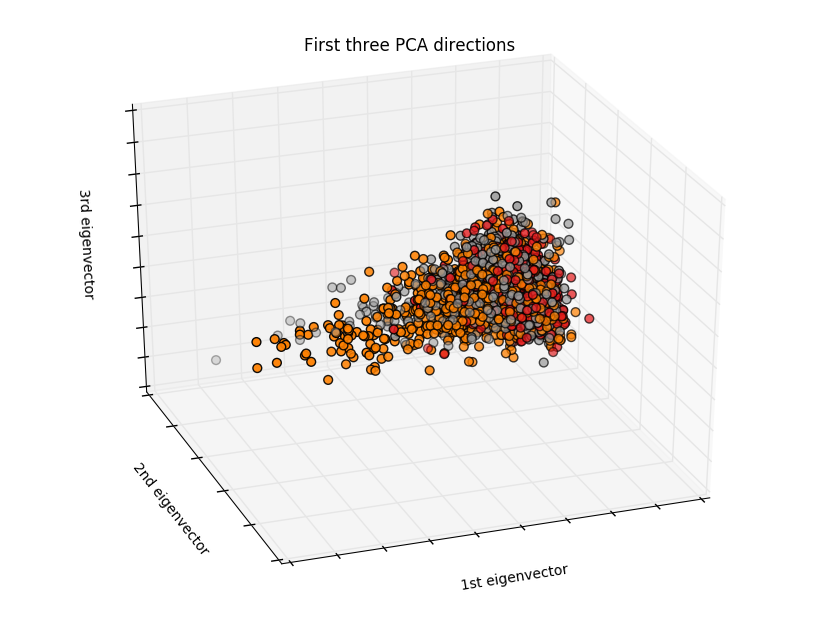

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(x)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

([], <a list of 0 Text yticklabel objects>)

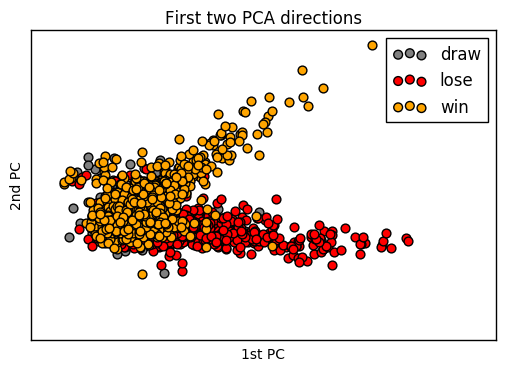

In [131]:

# plt.figure(2, figsize=(8, 6))
plt.clf()
fig, ax = plt.subplots()
# Plot the training points
labels = ['draw','lose','win']
colors = ['gray','red','orange']
for i in range(3):   
    ax.scatter(X_reduced[y==i, 0], X_reduced[y==i, 1], c=colors[i],label = labels[i],cmap=plt.cm.Set1,s=40,
                edgecolor='k')


plt.title("First two PCA directions")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
ax.legend()
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



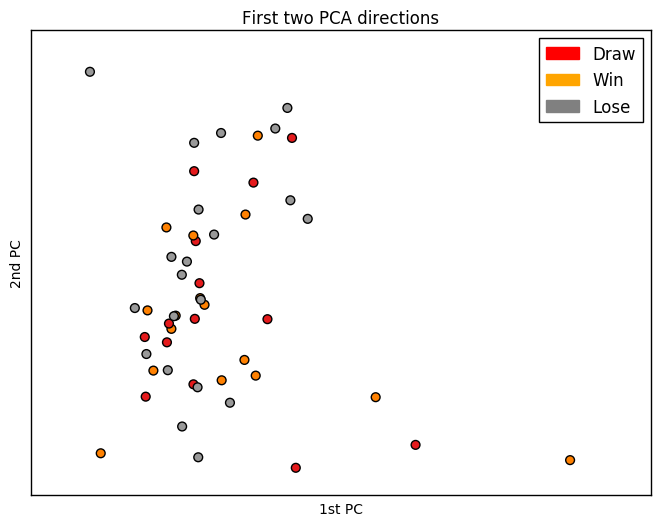

In [40]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1,s=40,
            edgecolor='k')

plt.title("First two PCA directions")
plt.xlabel("1st PC")
plt.ylabel("2nd PC")

plt.xticks(())
plt.yticks(())

# I Need a legend here
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Draw')
orange_patch = mpatches.Patch(color='orange', label='Win')
gray_patch = mpatches.Patch(color='gray', label='Lose')
plt.legend(handles=[red_patch,orange_patch,gray_patch])
plt.show()


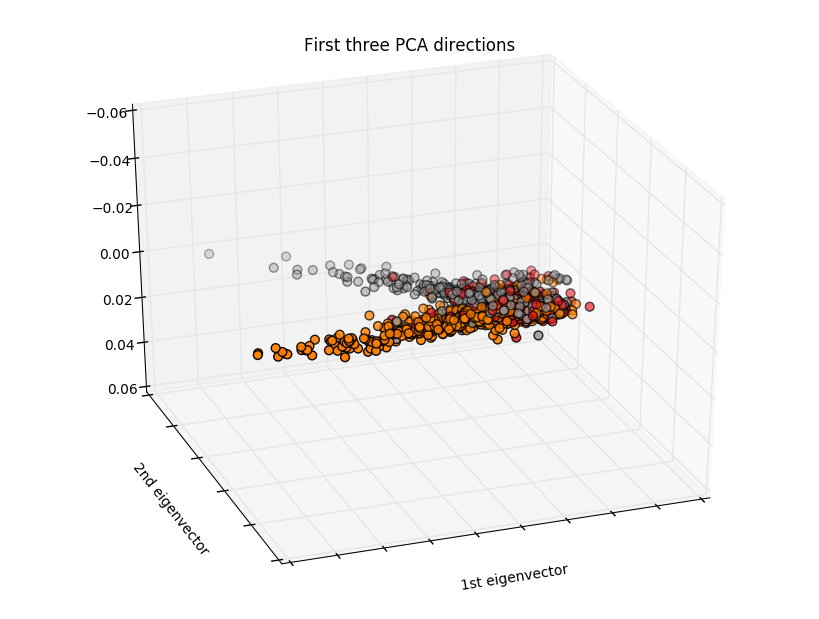

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=2).fit_transform(x)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

plt.show()

In [83]:
win_avg_odd.mean()

2.2082655470438031

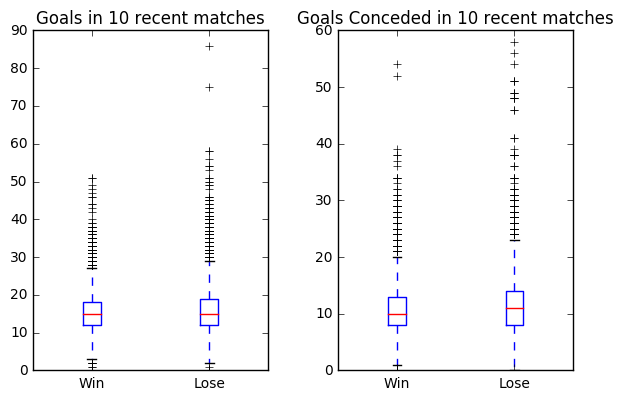

In [58]:
fig, axs = plt.subplots(1,2)
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)
# basic plot
axs[0].boxplot([win_goalF,lose_goalF],labels=['Win','Lose'])
axs[0].set_title('Goals in 10 recent matches')

# notched plot
axs[1].boxplot([win_goalA,lose_goalA],labels=['Win','Lose'])
axs[1].set_title('Goals Conceded in 10 recent matches')

plt.show()

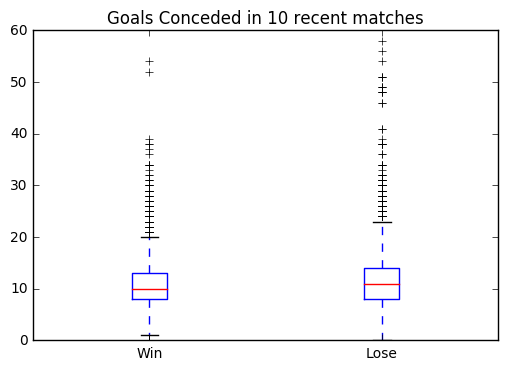

In [52]:
win_goalA = pd.concat([win_result['f_goalA_1'], lose_result['f_goalA_2']])
lose_goalA = pd.concat([lose_result['f_goalA_1'], win_result['f_goalA_2']])


plt.figure()
plt.boxplot([win_goalA,lose_goalA],labels=['Win','Lose'])
plt.title('Goals Conceded in 10 recent matches')
plt.show()

In [20]:
print(home1.shape[0])
print(home2.shape[0])

2779
2894


In [21]:
data_2005.shape[0]

11958

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B8A34390>], dtype=object)

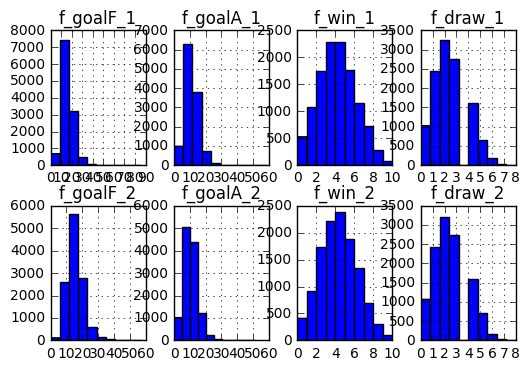

In [18]:
fig, axes = plt.subplots(2, 4)
data_2005.hist('f_goalF_1', ax=axes[0,0])
data_2005.hist('f_goalA_1', ax=axes[0,1])
data_2005.hist('f_win_1', ax=axes[0,2])
data_2005.hist('f_draw_1', ax=axes[0,3])

data_2005.hist('f_goalF_2', ax=axes[1,0])
data_2005.hist('f_goalA_2', ax=axes[1,1])
data_2005.hist('f_win_2', ax=axes[1,2])
data_2005.hist('f_draw_2', ax=axes[1,3])

# data_2005.hist('f_goalF_1',bins=100, ax=axes[0,0])
# data_2005.hist('f_goalA_1',bins=100, ax=axes[0,1])
# data_2005.hist('f_win_1',bins=100, ax=axes[0,2])
# data_2005.hist('f_draw_1',bins=100, ax=axes[0,3])

# data_2005.hist('f_goalF_2',bins=100, ax=axes[1,0])
# data_2005.hist('f_goalA_2',bins=100, ax=axes[1,1])
# data_2005.hist('f_win_2',bins=100, ax=axes[1,2])
# data_2005.hist('f_draw_2',bins=100, ax=axes[1,3])

In [ ]:
data = [data, d2, d2[::2, 0]]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data[:,[]])

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B5DE3978>], dtype=object)

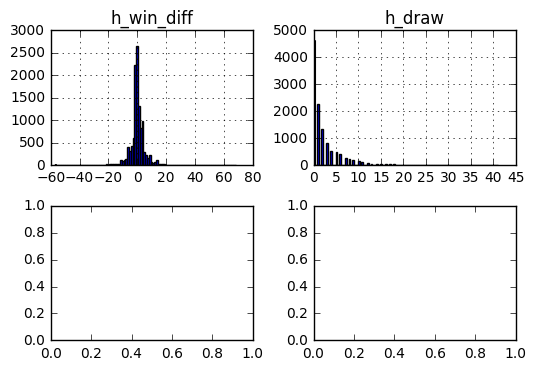

In [15]:
fig, axes = plt.subplots(2, 2)
data_2005.hist('h_win_diff',bins=100, ax=axes[0,0])
data_2005.hist('h_draw',bins=100, ax=axes[0,1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000179B3E46F98>], dtype=object)

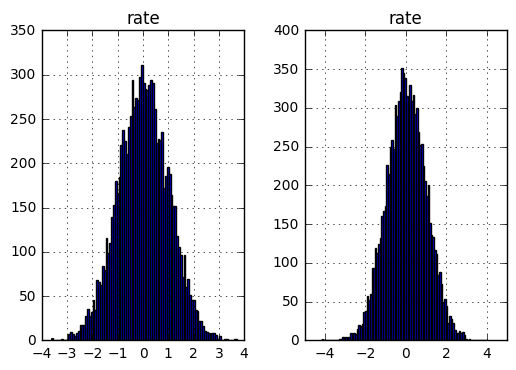

In [9]:
dflux = pd.DataFrame(dict(rate=np.random.randn(10000)))
dflux2 = pd.DataFrame(dict(rate=np.random.randn(10000)))

fig, axes = plt.subplots(1, 2)

dflux.hist('rate', bins=100, ax=axes[0])
dflux2.hist('rate', bins=100, ax=axes[1])

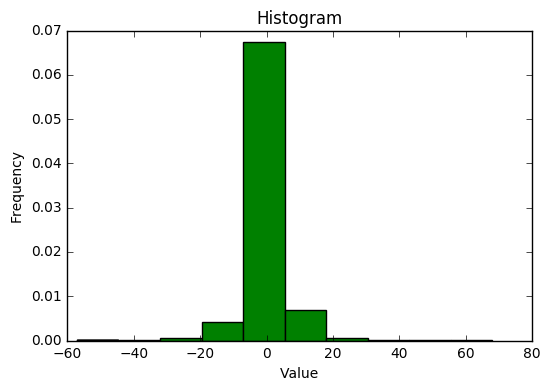

In [8]:
plt.hist(data_2005['h_win_diff'], facecolor='green')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import plotly.plotly as py
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

gaussian_numbers = np.random.randn(1000)
plt.hist(gaussian_numbers)
plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")